## 학습목표
- 목적에 맞춰 데이터를 준비하고 다듬는 방법을 알아보자

In [1]:
import pandas as pd
import os

### 1. 데이터 병합

#### concat

- 4, 5, 6월 pay-info 데이터를 각각 불러와 한개의 df로 병합해보자

In [2]:
# concat : 데이터를 행 방향이나 열 방향으로 단순히 붙이는 함수
print(os.getcwd())

C:\Users\dxsch\데이터분석


In [3]:
# 작업 디렉토리 변경
os.chdir("./data")

In [4]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'hr-info.csv',
 'hr-pay-info.csv',
 'org-info.csv',
 'total_pay_info.csv',
 '월별급여',
 '육군신체측정정보.csv']

In [5]:
# 월별급여 폴더 내부의 파일명 읽기
file_names = os.listdir("./월별급여")

In [6]:
file_names

['hr-pay-info-4월.csv', 'hr-pay-info-5월.csv', 'hr-pay-info-6월.csv']

In [7]:
pay_df_list = []  # 빈 리스트 생성
for fn in file_names:
    df = pd.read_csv("./월별급여/"+fn, encoding='euc-kr')
    pay_df_list.append(df)
    # display(df)  # 확인용

In [8]:
# 데이터 병합
total_df = pd.concat(pay_df_list)
total_df

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240401,월급,850
1,E00181,20240401,월급,791
2,E00164,20240401,월급,758
3,E00190,20240401,월급,708
4,E00209,20240401,월급,716
...,...,...,...,...
146,E00322,20240601,월급,375
147,E00389,20240601,월급,375
148,E00438,20240601,월급,375
149,E00304,20240601,월급,375


In [9]:
# csv파일로 저장
total_df.to_csv("./total_pay_info.csv", index=False)  # index가 하나의 column으로 저장하지 않기 위해 

- org_info 데이터에 각 조직별 조직 인원 수, 평균 나이, 평균근무년수, 평균연봉을 추가하자

In [10]:
# 조직정보 데이터 확인
org_info = pd.read_csv("./org-info.csv", encoding='euc-kr', index_col="ORG_CD")  # ORG_CD를 인덱스로 설정
org_info.head()

,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role
ORG_CD,,,,,,,
ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.
ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다."
ORG003,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Customer Support Team,TV 고객 지원 팀,TV 고객 지원 서비스 제공 및 고객 만족도를 높이기 위한 해결책을 제공합니다.
ORG004,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Core Development Team,webOS 핵심 개발 팀,webOS 플랫폼의 핵심 기능 개발 및 유지보수를 담당합니다.
ORG005,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS User Interface Team,webOS 사용자 인터페이스 팀,webOS의 사용자 인터페이스 디자인 및 개선을 담당합니다.


In [11]:
hr_info = pd.read_csv("./hr-info.csv", encoding = "EUC-KR")
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
196,E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
197,E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
198,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.00,4500,NaN,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


In [12]:
# hr_info에서 groupby를 이용해 조직별 조직 인원 수, 평균나이, 평균근무년수, 평균 연봉 df 생성
org_agg = hr_info.groupby(by='ORG_CD').agg({
                'ENAME': 'count',
                'AGE': 'mean',
                'SERVICE_YEAR': 'mean',
                'SALARY': 'mean'
            })
org_agg

,ENAME,AGE,SERVICE_YEAR,SALARY
ORG_CD,,,,
ORG001,6,26.166667,0.333333,5033.333333
ORG002,4,34.000000,7.500000,6550.000000
ORG003,5,34.600000,7.600000,6480.000000
ORG004,11,35.181818,7.000000,6445.454545
ORG005,8,29.250000,2.000000,5525.000000
ORG006,6,30.833333,4.166667,5966.666667
ORG007,7,36.714286,8.000000,6728.571429
ORG008,5,32.400000,5.200000,6020.000000
ORG009,5,29.800000,2.200000,5520.000000


In [13]:
# org_info와 조직구성된 데이터에서 추출한 df를 가로로 병합
# 주의 : concat을 이용한 병합 시 각 df의 인덱스를 같게 해야 올바른 병합이 일어남
org_info_new = pd.concat([org_info, org_agg], axis=1) # axis: 병합방향 결정(0은 세로, 1은 가로)
org_info_new

,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role,ENAME,AGE,SERVICE_YEAR,SALARY
ORG_CD,,,,,,,,,,,
ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.,6,26.166667,0.333333,5033.333333
ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다.",4,34.000000,7.500000,6550.000000
ORG003,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Customer Support Team,TV 고객 지원 팀,TV 고객 지원 서비스 제공 및 고객 만족도를 높이기 위한 해결책을 제공합니다.,5,34.600000,7.600000,6480.000000
ORG004,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Core Development Team,webOS 핵심 개발 팀,webOS 플랫폼의 핵심 기능 개발 및 유지보수를 담당합니다.,11,35.181818,7.000000,6445.454545
ORG005,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS User Interface Team,webOS 사용자 인터페이스 팀,webOS의 사용자 인터페이스 디자인 및 개선을 담당합니다.,8,29.250000,2.000000,5525.000000
ORG006,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Quality Assurance Team,webOS 품질 보증 팀,webOS 소프트웨어의 품질 검증 및 테스트를 수행합니다.,6,30.833333,4.166667,5966.666667
ORG007,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Global Sales Strategy Team,글로벌 판매 전략 팀,"글로벌 판매 전략을 수립하고, 주요 시장에서의 판매 목표를 설정합니다.",7,36.714286,8.000000,6728.571429
ORG008,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Key Account Management Team,주요 고객 관리 팀,"주요 고객과의 관계를 관리하고, 맞춤형 솔루션을 제공합니다.",5,32.400000,5.200000,6020.000000
ORG009,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Customer Insights Team,고객 통찰 팀,"고객 데이터를 분석하여 인사이트를 도출하고, 이를 기반으로 제품 및 서비스 개선안을...",5,29.800000,2.200000,5520.000000


#### merge
- 공통된 컬럼을 기준으로 양쪽의 데이터를 병합할 때 활용
- 데이터베이스의 join 개념을 떠올리면 좋다(inner, outer, left, right)

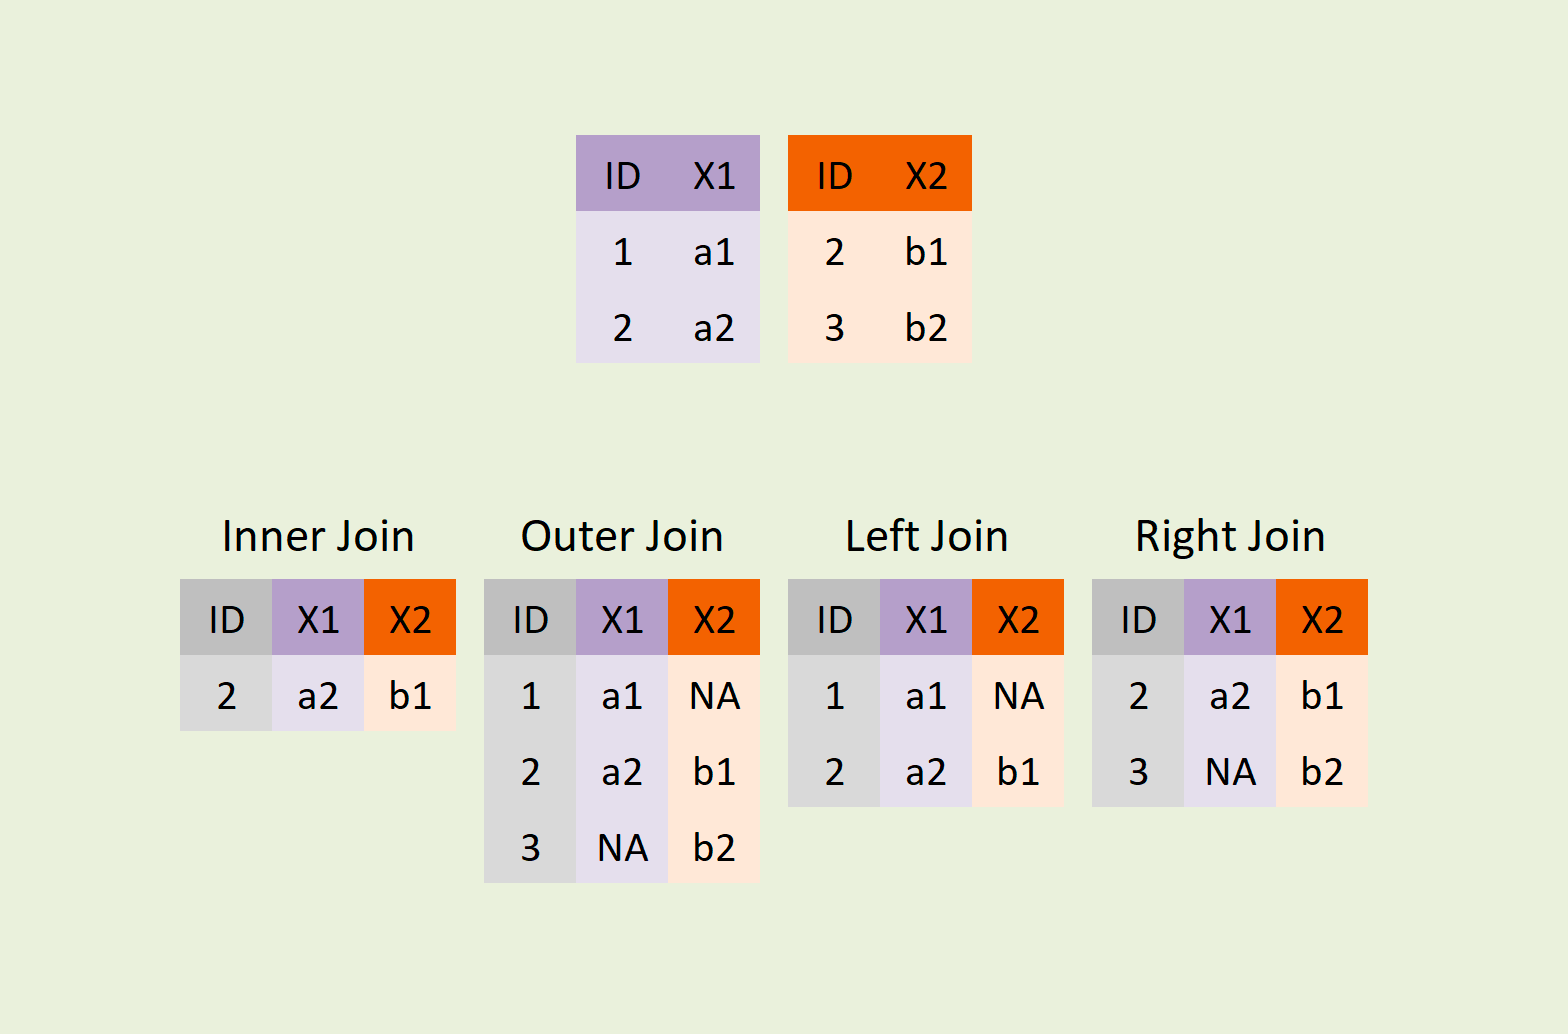

In [14]:
# 급여 지급내역 데이터 로딩
hr_pay_info = pd.read_csv("./hr-pay-info.csv", encoding="EUC-KR")
hr_pay_info

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240601,월급,850
1,E00181,20240601,월급,791
2,E00164,20240601,월급,758
3,E00190,20240601,월급,708
4,E00209,20240601,월급,716
...,...,...,...,...
750,E00322,20240401,상여금,300
751,E00389,20240401,상여금,300
752,E00438,20240401,상여금,300
753,E00304,20240401,상여금,300


In [15]:
# 데이터 수 확인
print(hr_info.shape)
print(hr_pay_info.shape)

# => 연결해주는 col은? "EID"

(200, 20)
(755, 4)


In [16]:
# 둘 다 가지고 있는 EID를 중심으로 merge 해보자
# 구성원 정보에서 사용할 EID, 이름, 성별 추출
hr_info_df = hr_info[["EID", "ENAME", "GENDER"]]
hr_info_df

,EID,ENAME,GENDER
0,E00206,시이오,M
1,E00181,나사장,F
2,E00164,난부사장,M
3,E00190,판라다,F
4,E00209,누훈봉,M
...,...,...,...
195,E00322,부탐회,F
196,E00389,초두반,F
197,E00438,권개득,M
198,E00304,탐출조,M


In [17]:
# 조직구성원 정보를 기반으로 merge
total_salary_df1 = pd.merge(hr_info_df, hr_pay_info, how='left', on='EID')  # EID를 기준으로 leftjoin
total_salary_df1

,EID,ENAME,GENDER,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,시이오,M,20240601.0,월급,850.0
1,E00206,시이오,M,20240501.0,월급,850.0
2,E00206,시이오,M,20240401.0,월급,850.0
3,E00206,시이오,M,20240401.0,성과급,425.0
4,E00206,시이오,M,20240401.0,상여금,300.0
...,...,...,...,...,...,...
799,E00428,을충나,F,20240601.0,월급,375.0
800,E00428,을충나,F,20240501.0,월급,375.0
801,E00428,을충나,F,20240401.0,월급,375.0
802,E00428,을충나,F,20240401.0,성과급,188.0


In [18]:
# 급여지급 내역을 중심으로 merge
total_salary_df2 = pd.merge(hr_info_df, hr_pay_info, how='right', on='EID')  # EID를 기준으로 rightjoin
total_salary_df2

,EID,ENAME,GENDER,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,시이오,M,20240601,월급,850
1,E00181,나사장,F,20240601,월급,791
2,E00164,난부사장,M,20240601,월급,758
3,E00190,판라다,F,20240601,월급,708
4,E00209,누훈봉,M,20240601,월급,716
...,...,...,...,...,...,...
750,E00322,부탐회,F,20240401,상여금,300
751,E00389,초두반,F,20240401,상여금,300
752,E00438,권개득,M,20240401,상여금,300
753,E00304,탐출조,M,20240401,상여금,300


In [19]:
# 지급내역이 없는 인원들을 확인해보자
no_money = total_salary_df1[total_salary_df1["PAYMENT_DY"].isnull()]
no_money

,EID,ENAME,GENDER,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
80,E00207,초디소,M,NaN,NaN,NaN
86,E00239,헌란처,M,NaN,NaN,NaN
102,E00323,묵단언,F,NaN,NaN,NaN
108,E00394,우전회,F,NaN,NaN,NaN
119,E00174,탐선반,M,NaN,NaN,NaN
150,E00274,민남무,M,NaN,NaN,NaN
181,E00334,무공담,M,NaN,NaN,NaN
182,E00445,속묵우,M,NaN,NaN,NaN
203,E00283,도온강,F,NaN,NaN,NaN
204,E00312,장춘란,F,NaN,NaN,NaN


In [20]:
# 지급내역이 없는 사람들이 언제 퇴사를 했는지 알아보자
pd.merge(no_money, hr_info)[["ENAME", "RETIRE_DATE"]]

,ENAME,RETIRE_DATE
0,초디소,2022-02-28
1,헌란처,2023-02-28
2,묵단언,2023-02-28
3,우전회,2024-02-29
4,탐선반,2024-02-29
5,민남무,2024-02-29
6,무공담,2024-02-29
7,속묵우,2024-02-29
8,도온강,2024-02-29
9,장춘란,2024-02-29


### 2. 정렬

#### sort
- 인덱스를 기준으로 정렬하기: df.sort_index()
- 값을 기준으로 정렬하기: df.sort_valeus()

In [21]:
# 행인덱스, 열인덱스 정렬 기준 정하기
# 인덱스 지정 후 정렬 
hr_info.set_index("EID").sort_index()  # 행 인덱스 기준으로 정렬

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00163,득치패,M,ORG013,P008,28,0,학사 학위,0.00,5000,2024-03-01,4,"Project Management, Salesforce, Java",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00165,내감반,M,ORG006,P008,24,0,학사 학위,0.00,5000,2024-03-01,4,"Python, Data Analysis",Y,2024-03-01,NaN,NaN,NaN,KOREA,Y
E00167,명묵말,M,ORG013,P005,42,12,석사 학위,3.88,7300,2024-03-01,46,Salesforce,Y,2012-03-01,NaN,NaN,NaN,KOREA,Y
E00168,인환숙,M,ORG025,P007,30,1,학사 학위,4.18,5600,2024-03-01,60,Data Analysis,N,2023-03-01,2024-03-01,이직,N,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00494,탄배매,F,ORG030,P007,30,1,학사 학위,3.67,5600,2024-03-01,49,"Salesforce, Java, Marketing",N,2023-03-01,2024-03-01,건강 문제,N,India,Y
E00495,충창동,F,ORG017,P007,30,1,학사 학위,1.92,5600,2024-03-01,59,"Marketing, Project Management, Data Analysis",N,2023-03-01,2024-03-01,이직,N,UK,Y
E00496,우봉망,F,ORG002,P006,35,7,학사 학위,1.20,6700,2024-03-01,62,"Project Management, Marketing",Y,2017-03-01,NaN,NaN,NaN,USA,Y


In [22]:
# 컬럼기준 정렬
hr_info.sort_index(axis=1)

,ACTIVE_STATE,AGE,EDU_LEVEL,EID,ENAME,GENDER,HIRE_DATE,LAST_PROMO_DT,NATION,ORG_CD,PERFORMANCE_SCORE,POS_CD,REHIRE_YN,RETIRE_DATE,RETIRE_REASON,ROUNDING_DEDUCTION,SALARY,SERVICE_YEAR,SKILLS,TRAINING_HOURS
0,Y,49,박사 학위,E00206,시이오,M,1999-03-01,2024-03-01,KOREA,NaN,4.50,P001,NaN,NaN,NaN,Y,10200,25,"Marketing, Salesforce",240
1,Y,49,박사 학위,E00181,나사장,F,2000-03-01,2024-03-01,KOREA,NaN,4.60,P002,NaN,NaN,NaN,Y,9500,24,"Project Management, Marketing",236
2,Y,48,박사 학위,E00164,난부사장,M,2002-03-01,2024-03-01,KOREA,NaN,4.60,P003,NaN,NaN,NaN,Y,9100,22,"Salesforce, Data Analysis, Java",240
3,Y,47,박사 학위,E00190,판라다,F,2006-03-01,2024-03-01,KOREA,ORG007,3.51,P004,NaN,NaN,NaN,Y,8500,18,"Java, Data Analysis, Salesforce",96
4,Y,47,박사 학위,E00209,누훈봉,M,2005-03-01,2023-03-01,KOREA,ORG023,3.38,P004,NaN,NaN,NaN,Y,8600,19,"Java, Salesforce",66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Y,23,학사 학위,E00322,부탐회,F,2024-09-01,NaN,KOREA,ORG014,0.00,P009,NaN,NaN,NaN,N,4500,0,Java,4
196,Y,23,학사 학위,E00389,초두반,F,2024-09-01,NaN,KOREA,ORG012,0.00,P009,NaN,NaN,NaN,N,4500,0,"Salesforce, Java",4
197,Y,23,학사 학위,E00438,권개득,M,2024-09-01,NaN,KOREA,ORG024,0.00,P009,NaN,NaN,NaN,N,4500,0,Python,4
198,Y,24,학사 학위,E00304,탐출조,M,2024-09-01,NaN,KOREA,ORG009,0.00,P009,NaN,NaN,NaN,N,4500,0,Salesforce,4


In [23]:
# 값을 기준으로 정렬(연봉)
# hr_info.sort_values(by="SALARY")  # 오름차순 정렬
hr_info.sort_values(by="SALARY", ascending=False)  # 내림차순 정렬

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
7,E00487,고명초,F,ORG014,P004,47,20,석사 학위,1.81,8600,2022-03-01,49,"Marketing, Salesforce, Project Management",Y,2004-03-01,NaN,NaN,NaN,Japan,Y
10,E00294,중우방,F,ORG021,P004,48,19,박사 학위,2.56,8600,2023-03-01,12,"Python, Salesforce, Java",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,E00300,랑화구,F,ORG001,P009,22,0,학사 학위,0.00,4500,NaN,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N
184,E00275,복판백,M,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Marketing, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
183,E00192,감옥신,F,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Project Management, Python, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
182,E00183,용조담,F,ORG023,P009,22,0,학사 학위,0.00,4500,NaN,4,"Python, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N


In [24]:
# 두 가지 기준으로 정렬하기 -> 나이, 연봉
hr_info.sort_values(by=["AGE", "SALARY"])   # , ascending=[True, False] 추가하면 오름차순/내림차순 설정 가능

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
182,E00183,용조담,F,ORG023,P009,22,0,학사 학위,0.00,4500,NaN,4,"Python, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
183,E00192,감옥신,F,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Project Management, Python, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
184,E00275,복판백,M,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Marketing, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
185,E00281,빈태봉,F,ORG021,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,Java,N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
186,E00300,랑화구,F,ORG001,P009,22,0,학사 학위,0.00,4500,NaN,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,E00411,구류길,M,ORG004,P004,48,18,박사 학위,4.87,8500,2024-03-01,37,"Data Analysis, Java, Python",Y,2006-03-01,NaN,NaN,NaN,USA,Y
10,E00294,중우방,F,ORG021,P004,48,19,박사 학위,2.56,8600,2023-03-01,12,"Python, Salesforce, Java",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y


In [58]:
# 정렬된 값을 원본데이터에 적용하기
# hr_info = hr_info.sort_values(by="AGE")
hr_info.sort_values(by='AGE', inplace=True, ascending = False)  # 간단하게   , ascending = False 가

#### rank

In [26]:
# 낮은 값이 rank1
org_info_new['SALARY'].rank()

ORG_CD
ORG001     2.0
ORG002    28.0
ORG003    26.0
ORG004    25.0
ORG005     8.0
ORG006    15.0
ORG007    30.0
ORG008    16.0
ORG009     6.5
ORG010    23.0
ORG011    29.0
ORG012    11.0
ORG013    14.0
ORG014    17.5
ORG015     1.0
ORG016    27.0
ORG017     6.5
ORG018    12.0
ORG019     5.0
ORG020     3.0
ORG021    24.0
ORG022    17.5
ORG023    10.0
ORG024    13.0
ORG025    20.0
ORG026     4.0
ORG027    21.0
ORG028    19.0
ORG029    22.0
ORG030     9.0
Name: SALARY, dtype: float64

In [30]:
# 높은 값이 rank1
org_info_new['SALARY_RANK'] = org_info_new['SALARY'].rank(ascending=False)
org_info_new.head(10)

,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role,ENAME,AGE,SERVICE_YEAR,SALARY,SALARY_RANK
ORG_CD,,,,,,,,,,,,
ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.,6,26.166667,0.333333,5033.333333,29.0
ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다.",4,34.000000,7.500000,6550.000000,3.0
ORG003,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Customer Support Team,TV 고객 지원 팀,TV 고객 지원 서비스 제공 및 고객 만족도를 높이기 위한 해결책을 제공합니다.,5,34.600000,7.600000,6480.000000,5.0
ORG004,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Core Development Team,webOS 핵심 개발 팀,webOS 플랫폼의 핵심 기능 개발 및 유지보수를 담당합니다.,11,35.181818,7.000000,6445.454545,6.0
ORG005,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS User Interface Team,webOS 사용자 인터페이스 팀,webOS의 사용자 인터페이스 디자인 및 개선을 담당합니다.,8,29.250000,2.000000,5525.000000,23.0
ORG006,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Quality Assurance Team,webOS 품질 보증 팀,webOS 소프트웨어의 품질 검증 및 테스트를 수행합니다.,6,30.833333,4.166667,5966.666667,16.0
ORG007,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Global Sales Strategy Team,글로벌 판매 전략 팀,"글로벌 판매 전략을 수립하고, 주요 시장에서의 판매 목표를 설정합니다.",7,36.714286,8.000000,6728.571429,1.0
ORG008,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Key Account Management Team,주요 고객 관리 팀,"주요 고객과의 관계를 관리하고, 맞춤형 솔루션을 제공합니다.",5,32.400000,5.200000,6020.000000,15.0
ORG009,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Customer Insights Team,고객 통찰 팀,"고객 데이터를 분석하여 인사이트를 도출하고, 이를 기반으로 제품 및 서비스 개선안을...",5,29.800000,2.200000,5520.000000,24.5


### 3. 재구조화

#### pivot
- df.pivot(index='컬럼명', columns='컬럼명', values='컬럼명')

In [39]:
# 4~6월까지 각 사람별로 지급된 급여를 컬럼으로 정리하고 싶다
# 월급데이터 불리언색인 -> 사원 번호, 지급일, 금액 추출
hr_pay_info_df = hr_pay_info[hr_pay_info['PAYMENT_DVCD'] == '월급'][['EID', 'PAYMENT_DY', 'PAYMENT_AMOUNT']]
hr_pay_info_pivot = hr_pay_info_df.pivot(index='EID', columns='PAYMENT_DY', values='PAYMENT_AMOUNT')
hr_pay_info_pivot

PAYMENT_DY,20240401,20240501,20240601
EID,,,
E00163,417,417,417
E00164,758,758,758
E00165,416,416,416
E00167,608,608,608
E00169,708,708,708
...,...,...,...
E00487,716,716,716
E00491,575,575,575
E00496,558,558,558


#### melt
- df.melt(id_vars='컬럼명', value_vars=['컬럼명', '컬럼명'])

In [42]:
# 인덱스를 컬럼으로 옮겨주는 기능(기조노 인덱스를 숫자 인덱스로 초기화)
hr_pay_info_pivot.reset_index()  # EID -> 인덱스에서 column으로 빠짐

PAYMENT_DY,EID,20240401,20240501,20240601
0,E00163,417,417,417
1,E00164,758,758,758
2,E00165,416,416,416
3,E00167,608,608,608
4,E00169,708,708,708
...,...,...,...,...
146,E00487,716,716,716
147,E00491,575,575,575
148,E00496,558,558,558
149,E00497,566,566,566


In [43]:
hr_pay_info_pivot.reset_index().melt(id_vars='EID', value_vars=[20240401, 20240501, 20240601])

,EID,PAYMENT_DY,value
0,E00163,20240401,417
1,E00164,20240401,758
2,E00165,20240401,416
3,E00167,20240401,608
4,E00169,20240401,708
...,...,...,...
448,E00487,20240601,716
449,E00491,20240601,575
450,E00496,20240601,558
451,E00497,20240601,566


### 4. 데이터 처리

#### apply
- 사용자 정의 함수를 이용해 행단위 또는 열단위로 직접 작성한 알고리즘을 적용할 수 있는 기능

In [54]:
# skills에 따라 능력치 점수를 만들어보자
# 프로그램 스킬1점 (Java or Python)
# 데이터분석 스킬 2점(Data Analysis)

def skill(row):

    point = 0
    
    if 'Java' in row['SKILLS'] or 'Python' in row['SKILLS']:
        point += 1
    
    if 'Data Analysis' in row['SKILLS']:
        point += 2

    return point

In [59]:
hr_info['SKILL_POINT'] = hr_info.apply(skill, axis=1)
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,SKILL_POINT
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,...,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,0
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,...,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,0
9,E00218,영할휘,M,ORG003,P004,48,20,학사 학위,3.22,8500,...,86,"Data Analysis, Salesforce",Y,2004-03-01,NaN,NaN,NaN,KOREA,Y,2
14,E00474,규아래,M,ORG016,P004,48,18,학사 학위,2.19,8300,...,44,Python,Y,2006-03-01,NaN,NaN,NaN,India,Y,1
13,E00411,구류길,M,ORG004,P004,48,18,박사 학위,4.87,8500,...,37,"Data Analysis, Java, Python",Y,2006-03-01,NaN,NaN,NaN,USA,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,E00192,감옥신,F,ORG017,P009,22,0,학사 학위,0.00,4500,...,4,"Project Management, Python, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N,1
190,E00364,사디길,M,ORG027,P009,22,0,고등학교 졸업,0.00,4500,...,4,Java,Y,2024-03-01,NaN,NaN,NaN,KOREA,N,1
191,E00382,망팽단,F,ORG026,P009,22,0,학사 학위,0.00,4500,...,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,1
182,E00183,용조담,F,ORG023,P009,22,0,학사 학위,0.00,4500,...,4,"Python, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N,1


#### drop
- 데이터 삭제

In [ ]:
# 행 삭제
# 여러개 -> [1, 2, ...] 리스트로 묶어서
hr_info.drop([1, 14], inplace=True)

In [60]:
# 열 삭제
hr_info.drop('ENAME', axis=1)

,EID,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,SKILL_POINT
0,E00206,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,0
1,E00181,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,0
9,E00218,M,ORG003,P004,48,20,학사 학위,3.22,8500,2022-03-01,86,"Data Analysis, Salesforce",Y,2004-03-01,NaN,NaN,NaN,KOREA,Y,2
14,E00474,M,ORG016,P004,48,18,학사 학위,2.19,8300,2024-03-01,44,Python,Y,2006-03-01,NaN,NaN,NaN,India,Y,1
13,E00411,M,ORG004,P004,48,18,박사 학위,4.87,8500,2024-03-01,37,"Data Analysis, Java, Python",Y,2006-03-01,NaN,NaN,NaN,USA,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,E00192,F,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Project Management, Python, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N,1
190,E00364,M,ORG027,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,Java,Y,2024-03-01,NaN,NaN,NaN,KOREA,N,1
191,E00382,F,ORG026,P009,22,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,1
182,E00183,F,ORG023,P009,22,0,학사 학위,0.00,4500,NaN,4,"Python, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N,1
